In [2]:
import numpy as np
import os
import sys

import wave
import copy
import math

from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Input, Flatten,Merge, Embedding, Convolution1D, Dropout, Bidirectional, Concatenate
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import label_binarize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence


from features import *
from helper import *

Using TensorFlow backend.


In [3]:
#################
#  Load data    #
#################
code_path = os.path.dirname(os.path.realpath(os.getcwd()))
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path = code_path + "/../../"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000
import pickle
with open('./data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [4]:
#################
#  Text feature #
#################
text = []

for ses_mod in data2:
    text.append(' '.join(ses_mod['transcription']['ind_ts']))

MAX_SEQUENCE_LENGTH = 500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

token_tr_X = tokenizer.texts_to_sequences(text)
x_train_text = []

x_train_text = sequence.pad_sequences(token_tr_X, maxlen=MAX_SEQUENCE_LENGTH)

In [5]:
with open('./g_word_embedding_matrix.pickle', 'rb') as handle:
    g_word_embedding_matrix = pickle.load(handle)

In [6]:
with open('./speech_features.pickle', 'rb') as handle:
    x_train_speech = pickle.load(handle)

In [7]:
# alignment
align = []
for ses_mod in data2:
    align_t = ses_mod['transcription']['align_t']
    align_t_ = [(int(x['SFrm']), int(x['Efrm'])) for x in align_t]
    align.append(align_t_)

In [8]:
def sum_frame(frame):
    frame_to, ali = frame
    features = []
    for sf, ef in ali:
        if sf == ef:
            print(sf)
        features.append(np.sum(frame_to.T[sf:ef+1].T, axis=1))
    features = np.array(features).T
    print("before pad", np.shape(features))
    features, _ = pad_sequence_into_array(features, maxlen=MAX_SEQUENCE_LENGTH)
    print("after pad", np.shape(features))
    print()
    return features.T

In [9]:
x_train_speech_ali = list(map(sum_frame, zip(x_train_speech, align)))
x_train_speech_ali = np.array(x_train_speech_ali)
np.shape(x_train_speech_ali)

before pad (34, 2)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 24)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 6)
after pad (34,

after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 25)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 33)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 14)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 21)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pa

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 26)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 11)
after pad (3

after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 37)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 14)
after pad (34, 500)

before pad (34, 53)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 34)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 14)
after pad (34, 500)

before pad (34, 36)
after pad (34, 500)

before

after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 26)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 21)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad 

before pad (34, 11)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 2)
after pad (34, 5

before pad (34, 6)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 37)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 43)
after pad (34, 500)

before pad (34, 9)
after pad (3

after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 36)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 39)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before 

before pad (34, 3)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 29)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 47)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 5)
after pad (34

before pad (34, 6)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 9)
after pad (34, 5

before pad (34, 5)
after pad (34, 500)

before pad (34, 25)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 25)
after pad (34, 500)

before pad (34, 33)
after pad (34, 500)

before pad (34, 29)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 29)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 31)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 11)
after pad 

before pad (34, 4)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 20)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 6)
after pad (34

before pad (34, 31)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 50)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 41)
after pad (34, 500)

before pad (34, 33)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 16)
after pa

before pad (34, 16)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 20)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 32)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 13)
after p

before pad (34, 11)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 21)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 20)
after pad (34, 500)

before pad (34, 6)
after pad (3

after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 21)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (

before pad (34, 3)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 14)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 20)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 47)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 17)
aft

before pad (34, 9)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 19)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 6)
after pad (34, 5

after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 14)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 14)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad

before pad (34, 25)
after pad (34, 500)

before pad (34, 27)
after pad (34, 500)

before pad (34, 67)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 28)
after pad (34, 500)

before pad (34, 34)
after pad (34, 500)

before pad (34, 35)
after pad (34, 500)

before pad (34, 24)
after pad (34, 500)

before pad (34, 20)
after pad (34, 500)

before pad (34, 42)
after pad (34, 500)

before pad (34, 24)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 34)
after pad (34, 500)

before pad (34, 31)
after pad (34, 500)

before pad (34, 12)
after p

before pad (34, 7)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 2)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 24)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 12)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 1)
after pad (34, 500)

before pad (34, 3)
after pad (34,

before pad (34, 32)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 17)
after pad (34, 500)

before pad (34, 16)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 15)
after pad (34, 500)

before pad (34, 11)
after pad (34, 500)

before pad (34, 26)
after pad (34, 500)

before pad (34, 13)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 23)
after pad (34, 500)

before pad (34, 20)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 24)
after pad (34, 500)

before pad (34, 24)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 5)
after pad (34, 500)

before pad (34, 30)
after pad (34, 500)

before pad (34, 10)
after

before pad (34, 7)
after pad (34, 500)

before pad (34, 10)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 9)
after pad (34, 500)

before pad (34, 8)
after pad (34, 500)

before pad (34, 7)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 3)
after pad (34, 500)

before pad (34, 21)
after pad (34, 500)

before pad (34, 6)
after pad (34, 500)

before pad (34, 4)
after pad (34, 500)

before pad (34, 18)
after pad (34, 500)

before pad (34, 22)
after pad (34, 500)



(4935, 500, 34)

In [10]:
##########
#    Y
Y=[]
for ses_mod in data2:
    Y.append(ses_mod['emotion'])
    
Y = label_binarize(Y,emotions_used)

Y.shape

(4935, 4)

In [11]:
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM = 300

In [12]:
##############
##  Model
def model_1(optimizer='adam'):
    input_speech = Input(shape=(MAX_SEQUENCE_LENGTH, 34))
    input_text = Input(shape=(MAX_SEQUENCE_LENGTH,))
    #model.add(Embedding(2737, 128, input_length=MAX_SEQUENCE_LENGTH))
    layer = Embedding(2736,
                  EMBEDDING_DIM,
                  weights = [g_word_embedding_matrix],
                  input_length = MAX_SEQUENCE_LENGTH,
                  trainable = True)(input_text)
    layer = Concatenate(axis=-1)([layer, input_speech])
    layer = Convolution1D(256, 3, border_mode='same')(layer)
    layer = Dropout(0.2)(layer)
    layer = Activation('relu')(layer)
    layer = Convolution1D(128, 3, border_mode='same')(layer)
    layer = Dropout(0.2)(layer)
    layer = Activation('relu')(layer)
    layer = Convolution1D(64, 3, border_mode='same')(layer)
    layer = Dropout(0.2)(layer)
    layer = Activation('relu')(layer)
    layer = Convolution1D(32, 3, border_mode='same')(layer)
    layer = Dropout(0.2)(layer)
    layer = Activation('relu')(layer)
    layer = Flatten()(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(4)(layer)
    prediction = Activation('softmax')(layer)

    model = Model(inputs=[input_speech, input_text], outputs=prediction)
    model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['acc'])
    return model

def model_2():
    input_speech = Input(shape=(MAX_SEQUENCE_LENGTH, 34))
    input_text = Input(shape=(MAX_SEQUENCE_LENGTH,))
    layer = Embedding(2736,
                      EMBEDDING_DIM,
                      weights = [g_word_embedding_matrix],
                      input_length = MAX_SEQUENCE_LENGTH,
                      trainable = True)(input_text)
    layer = Concatenate(axis=-1)([layer, input_speech])
    layer = LSTM(512, return_sequences=True)(layer)
    layer = LSTM(256, return_sequences=False)(layer)
    layer = Dense(512)(layer)
    layer = Activation('relu')(layer)
    layer = Dense(4)(layer)
    prediction = Activation('softmax')(layer)
    
    model = Model(inputs=[input_speech, input_text], outputs=prediction)
    model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['acc'])
    
    return model

def model_3():
    input_speech = Input(shape=(MAX_SEQUENCE_LENGTH, 34))
    input_text = Input(shape=(MAX_SEQUENCE_LENGTH,))
    layer = Embedding(2736, 128)(input_text)
    layer = Concatenate(axis=-1)([layer, input_speech])
    layer = LSTM(256, return_sequences=True)(layer)
    layer = LSTM(256, return_sequences=False)(layer)
    layer = Dense(512)(layer)
    layer = Activation('relu')(layer)
    layer = Dense(4)(layer)
    prediction = Activation('softmax')(layer)
    
    model = Model(inputs=[input_speech, input_text], outputs=prediction)
    model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['acc'])
    
    return model

In [13]:
model_1 = model_1()
model_1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 500, 300)      820800      input_2[0][0]                    
____________________________________________________________________________________________________
input_1 (InputLayer)             (None, 500, 34)       0                                            
____________________________________________________________________________________________________
concatenate_1 (Concatenate)      (None, 500, 334)      0           embedding_1[0][0]                
                                                                   input_1[0][0]           

/home/luban/miniconda3/envs/nluml/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 3, padding="same")`
  del sys.path[0]
/home/luban/miniconda3/envs/nluml/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, padding="same")`
  app.launch_new_instance()
/home/luban/miniconda3/envs/nluml/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/home/luban/miniconda3/envs/nluml/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`


In [14]:
hist = model_1.fit([x_train_speech_ali, x_train_text], Y, 
                    batch_size=100, epochs=125, verbose=1, 
                    validation_split=0.2)

Train on 3948 samples, validate on 987 samples
Epoch 1/125
3948/3948 [==============================] - 5s - loss: 1.8745 - acc: 0.2834 - val_loss: 1.3684 - val_acc: 0.3627
Epoch 2/125
3948/3948 [==============================] - 2s - loss: 1.3708 - acc: 0.3493 - val_loss: 1.3438 - val_acc: 0.3810
Epoch 3/125
3948/3948 [==============================] - 2s - loss: 1.3345 - acc: 0.3559 - val_loss: 1.3169 - val_acc: 0.4093
Epoch 4/125
3948/3948 [==============================] - 2s - loss: 1.2501 - acc: 0.4025 - val_loss: 1.2010 - val_acc: 0.4843
Epoch 5/125
3948/3948 [==============================] - 2s - loss: 1.1219 - acc: 0.4790 - val_loss: 1.1297 - val_acc: 0.5005
Epoch 6/125
3948/3948 [==============================] - 2s - loss: 0.9917 - acc: 0.5507 - val_loss: 1.0627 - val_acc: 0.5542
Epoch 7/125
3948/3948 [==============================] - 2s - loss: 0.8875 - acc: 0.6147 - val_loss: 1.0712 - val_acc: 0.5826
Epoch 8/125
3948/3948 [==============================] - 2s - loss: 0.7

3948/3948 [==============================] - 2s - loss: 0.1119 - acc: 0.9534 - val_loss: 2.5993 - val_acc: 0.6565
Epoch 66/125
3948/3948 [==============================] - 2s - loss: 0.1048 - acc: 0.9572 - val_loss: 2.5811 - val_acc: 0.6464
Epoch 67/125
3948/3948 [==============================] - 2s - loss: 0.0975 - acc: 0.9564 - val_loss: 2.5947 - val_acc: 0.6434
Epoch 68/125
3948/3948 [==============================] - 2s - loss: 0.0956 - acc: 0.9600 - val_loss: 2.7444 - val_acc: 0.6515
Epoch 69/125
3948/3948 [==============================] - 2s - loss: 0.1033 - acc: 0.9592 - val_loss: 2.6006 - val_acc: 0.6515
Epoch 70/125
3948/3948 [==============================] - 2s - loss: 0.1021 - acc: 0.9587 - val_loss: 2.6452 - val_acc: 0.6545
Epoch 71/125
3948/3948 [==============================] - 2s - loss: 0.1032 - acc: 0.9552 - val_loss: 2.4978 - val_acc: 0.6464
Epoch 72/125
3948/3948 [==============================] - 2s - loss: 0.1033 - acc: 0.9567 - val_loss: 2.5340 - val_acc: 0.65

In [15]:
def plt_acc(hist):
    import matplotlib.pyplot as plt
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

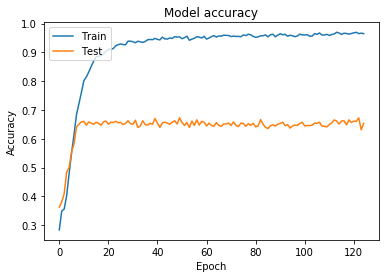

In [17]:
plt_acc(hist)

In [18]:
max(hist.history['val_acc'])

0.6727457045904892

In [19]:
model_2 = model_2()
model_2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 500, 300)      820800      input_4[0][0]                    
____________________________________________________________________________________________________
input_3 (InputLayer)             (None, 500, 34)       0                                            
____________________________________________________________________________________________________
concatenate_2 (Concatenate)      (None, 500, 334)      0           embedding_2[0][0]                
                                                                   input_3[0][0]           

In [20]:
hist = model_2.fit([x_train_speech_ali, x_train_text], Y, 
                    batch_size=100, epochs=30, verbose=1, 
                    validation_split=0.2)

Train on 3948 samples, validate on 987 samples
Epoch 1/30
3948/3948 [==============================] - 62s - loss: 1.2871 - acc: 0.4027 - val_loss: 1.1435 - val_acc: 0.5258
Epoch 2/30
3948/3948 [==============================] - 62s - loss: 1.0271 - acc: 0.5719 - val_loss: 1.0078 - val_acc: 0.5866
Epoch 3/30
3948/3948 [==============================] - 63s - loss: 0.8302 - acc: 0.6664 - val_loss: 0.9213 - val_acc: 0.6241
Epoch 4/30
3948/3948 [==============================] - 62s - loss: 0.6775 - acc: 0.7310 - val_loss: 0.9811 - val_acc: 0.6211
Epoch 5/30
3948/3948 [==============================] - 62s - loss: 0.5885 - acc: 0.7599 - val_loss: 0.9658 - val_acc: 0.6353
Epoch 6/30
3948/3948 [==============================] - 63s - loss: 0.4862 - acc: 0.8088 - val_loss: 1.1138 - val_acc: 0.6109
Epoch 7/30
3948/3948 [==============================] - 62s - loss: 0.4233 - acc: 0.8318 - val_loss: 1.1963 - val_acc: 0.6282
Epoch 8/30
3948/3948 [==============================] - 62s - loss: 0.3

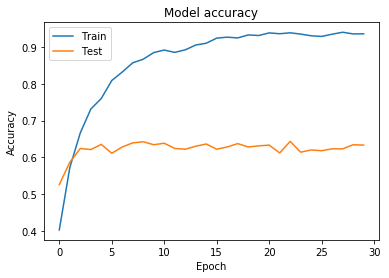

In [21]:
plt_acc(hist)

In [22]:
max(hist.history['val_acc'])

0.6433637262960819

In [23]:
model_3 = model_3()
model_3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_3 (Embedding)          (None, 500, 128)      350208      input_6[0][0]                    
____________________________________________________________________________________________________
input_5 (InputLayer)             (None, 500, 34)       0                                            
____________________________________________________________________________________________________
concatenate_3 (Concatenate)      (None, 500, 162)      0           embedding_3[0][0]                
                                                                   input_5[0][0]           

In [24]:
hist = model_3.fit([x_train_speech_ali, x_train_text], Y, 
                    batch_size=100, epochs=30, verbose=1, 
                    validation_split=0.2)

Train on 3948 samples, validate on 987 samples
Epoch 1/30
3948/3948 [==============================] - 60s - loss: 1.3510 - acc: 0.3465 - val_loss: 1.2525 - val_acc: 0.4428
Epoch 2/30
3948/3948 [==============================] - 58s - loss: 1.0472 - acc: 0.5471 - val_loss: 1.0528 - val_acc: 0.5552
Epoch 3/30
3948/3948 [==============================] - 58s - loss: 0.7810 - acc: 0.6925 - val_loss: 0.9186 - val_acc: 0.6474
Epoch 4/30
3948/3948 [==============================] - 58s - loss: 0.6347 - acc: 0.7546 - val_loss: 0.9767 - val_acc: 0.6332
Epoch 5/30
3948/3948 [==============================] - 59s - loss: 0.5325 - acc: 0.7936 - val_loss: 1.0148 - val_acc: 0.6221
Epoch 6/30
3948/3948 [==============================] - 59s - loss: 0.4654 - acc: 0.8191 - val_loss: 1.1329 - val_acc: 0.6231
Epoch 7/30
3948/3948 [==============================] - 59s - loss: 0.4318 - acc: 0.8321 - val_loss: 1.1347 - val_acc: 0.6403
Epoch 8/30
3948/3948 [==============================] - 58s - loss: 0.3

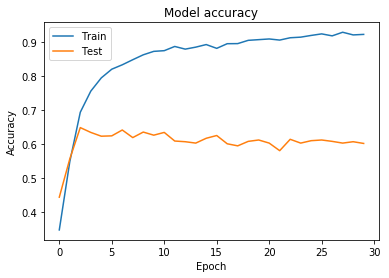

In [25]:
plt_acc(hist)

In [26]:
max(hist.history['val_acc'])

0.6474164254518023